# CART Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree

##### Import the data

In [3]:
# Read in the Amusment Park Attendance csv. Call the object "df"

# YOUR CODE HERE
df = pd.read_csv('Amusment_Park_Attendance.csv')


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attendees      8603 non-null   int64  
 1   month          8603 non-null   int64  
 2   day            8603 non-null   int64  
 3   hour           8603 non-null   int64  
 4   day_of_week    8603 non-null   object 
 5   holiday        8603 non-null   int64  
 6   temp           8603 non-null   float64
 7   temp_wb        8603 non-null   int64  
 8   rel_humidity   8603 non-null   int64  
 9   windspeed      8603 non-null   int64  
 10  precipitation  8603 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 739.4+ KB


###### First, tell Pandas which variables should be treated as categorical.

In [5]:

# YOUR CODE HERE
categoricals = ['month', 'day', 'hour', 'day_of_week', 'holiday']
df[categoricals] = df[categoricals].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   attendees      8603 non-null   int64   
 1   month          8603 non-null   category
 2   day            8603 non-null   category
 3   hour           8603 non-null   category
 4   day_of_week    8603 non-null   category
 5   holiday        8603 non-null   category
 6   temp           8603 non-null   float64 
 7   temp_wb        8603 non-null   int64   
 8   rel_humidity   8603 non-null   int64   
 9   windspeed      8603 non-null   int64   
 10  precipitation  8603 non-null   float64 
dtypes: category(5), float64(2), int64(4)
memory usage: 448.6 KB


In [7]:
df.head(6)

,attendees,month,day,hour,day_of_week,holiday,temp,temp_wb,rel_humidity,windspeed,precipitation
0,440,1,1,0,Mon,0,6.6,0,59,16,1.0
1,660,1,1,1,Mon,0,4.8,0,59,11,1.0
2,660,1,1,2,Mon,0,4.8,-1,54,21,1.0
3,110,1,1,5,Mon,0,3.0,-2,54,18,1.0
4,330,1,1,6,Mon,0,3.0,-2,54,15,1.0
5,330,1,1,7,Mon,0,3.0,-2,54,11,1.0


# Training and Testing Datasets

###### Split the data 70/30 into a training and a test set.

In [8]:
# YOUR CODE HERE
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

###### Create 4 data sets out o the train and tests sets. You will have "X", "y", "X_test", and "y_test" sets. The y sets will consist of the attendees column from the respected X data set. 

In [9]:
# YOUR CODE HERE
X = df_train.copy()
y = X.pop('attendees')
X_test = df_test.copy()
y_test = X_test.pop('attendees')

###### Create the Linear Regression formula. 

In [10]:
# Assign the result to "my_formula"

# YOUR CODE HERE
my_formula = 'attendees ~ ' + '+'.join(df.columns[1:])

###### Generate teh OLS Regression modle and call it "est"

In [11]:

# YOUR CODE HERE
from statsmodels.formula.api import ols
est = ols(formula = my_formula, data=df_train).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              attendees   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:32:30   Log-Likelihood:                -66004.
No. Observations:                6022   AIC:                         1.322e+05
Df Residuals:                    5946   BIC:                         1.327e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.575e+04   3059

###### Define the OSR2 Helper function

In [13]:
def OSR2(y_pred, y_true, training_mean):
  '''
  Calculates out-of-sample R-squared
  '''
  baseline_error = np.sum(np.square((training_mean - y_true)))
  model_error = np.sum(np.square((y_pred - y_true)))
  return 1.0 - model_error/baseline_error

###### See the result of your test set on the linear regression model using your OSR2 helper function. Assign the result to "osr2_result"

In [14]:

osr2_result=OSR2(est.predict(X_test), y_test, y.mean())
print(osr2_result)

0.6884066434773946


###### Build a tree with default parameters. 

In [15]:
# Assign the result to "tree"
tree = DecisionTreeRegressor(random_state=42)

In [16]:
X.head()

,month,day,hour,day_of_week,holiday,temp,temp_wb,rel_humidity,windspeed,precipitation
5156,8,9,14,Thu,0,154.2,74,61,10,1.000
6290,9,26,1,Wed,0,129.0,68,90,5,1.000
2646,4,26,19,Thu,0,105.6,49,53,13,1.000
439,1,21,16,Sun,1,85.8,39,51,5,1.000
1379,3,2,16,Fri,0,76.8,39,86,46,0.075


###### One-hot encode the categorical variables

In [17]:

X = pd.get_dummies(X, columns = categoricals)
X_test = pd.get_dummies(X_test, columns = categoricals)

In [18]:
X.head()

,temp,temp_wb,rel_humidity,windspeed,precipitation,month_1,month_2,month_3,month_4,month_5,...,hour_23,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,holiday_0,holiday_1
5156,154.2,74,61,10,1.000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6290,129.0,68,90,5,1.000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2646,105.6,49,53,13,1.000,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
439,85.8,39,51,5,1.000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1379,76.8,39,86,46,0.075,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


###### Build a CART tree with the default settings.

In [19]:
tree.fit(X,y)

DecisionTreeRegressor(random_state=42)

###### How well does it do on the training set?

In [20]:
#Assign the output of OSR2 to "result" for grading purposes. 
result = OSR2(tree.predict(X), y, y.mean())
print(result)

1.0


###### See how big this tree is.

In [21]:
# Get the shape of the tree and assign the result to "tree_shape" for grading
# YOUR CODE HERE
tree.tree_.node_count, tree.tree_.max_depth

(11321, 47)

###### Before Pruning, see how it does on the test set.

In [22]:
OSR2(tree.predict(X_test), y_test, y.mean())

0.7781904676781646

# Cost Complexity Pruning

In [23]:
tree = DecisionTreeRegressor(random_state=42)

In [24]:
# Create the pruning path and assign the output to "path"
path = tree.cost_complexity_pruning_path(X,y)

In [25]:
#Get the Alpha values and assign them to "alphas"
alphas = path.ccp_alphas

In [26]:
# See how many alpha values you generated
len(alphas)

5185

##### Generate about ~50 trees, evenly sampled from this group.

In [27]:
alphas_small = alphas[::100]
alphas_small = alphas_small[::-1]

In [28]:
r2_all = []
osr2_all = []
node_counts = []

for alpha in alphas_small:
  tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
  tree.fit(X,y)
  y_pred = tree.predict(X)
  r2_all.append(OSR2(y_pred, y, y.mean()))
  y_pred = tree.predict(X_test)
  osr2_all.append(OSR2(y_pred, y_test, y.mean()))
  node_counts.append(tree.tree_.node_count)

Text(0.5, 1.0, 'Prediction quality vs tree size')

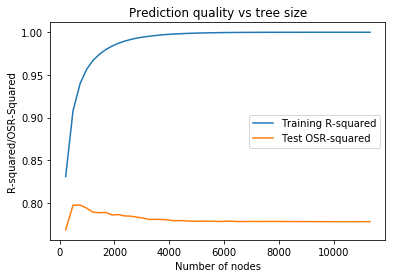

In [29]:
plt.plot(node_counts, r2_all, label='Training R-squared')
plt.plot(node_counts, osr2_all, label='Test OSR-squared')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('R-squared/OSR-Squared')
plt.title('Prediction quality vs tree size')

###### Extract the tree corresponding to the best OSR2.

In [30]:
opt_idx = np.argmax(osr2_all)

In [31]:
 tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alphas_small[opt_idx])
 tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=112830.96658742253, random_state=42)

In [32]:
tree.tree_.node_count, tree.tree_.max_depth

(751, 29)

In [33]:
def viz_tree(tree, font=12, figsize=(16,10)):
  '''
  draws a classification tree
  '''
  plt.figure(figsize=figsize)  # set plot size (denoted in inches)
  _ = plot_tree(tree,
                feature_names=X.columns,
                filled=True,
                fontsize=font)

###### Let's try to visualize it.

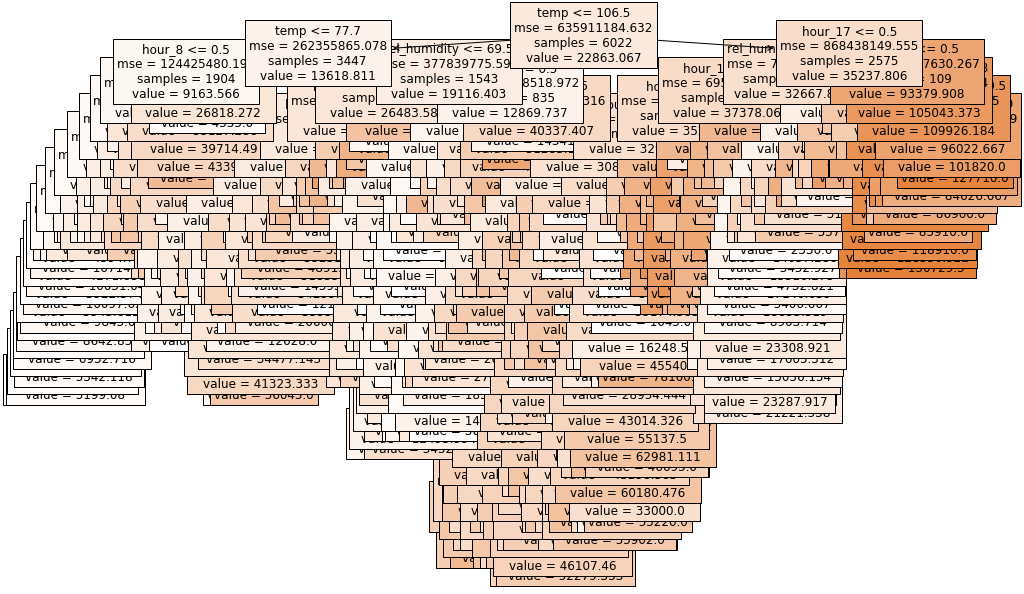

In [34]:
viz_tree(tree)

###### Confirm this tree's OSR2. 

In [35]:
#Assign the output to "osr2"
osr2=OSR2(tree.predict(X_test), y_test, y.mean())

print(osr2)

0.7976630986012803
